In [1]:
import tensorflow as tf
from IPython.display import SVG
from keras.utils import model_to_dot

In [2]:
from src.addons.watermark.models import create_watermark, create_extract_mark

---

# Watermaker

In [3]:
model = create_watermark((512, 512, 3), (32, 32, 1), 1.)

2023-12-25 23:29:15.554163: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-12-25 23:29:15.554184: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-12-25 23:29:15.554187: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-12-25 23:29:15.554220: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-25 23:29:15.554248: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 32, 32, 1)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 512, 512, 3)          0         ['input_1[0][0]']             
                                                                                                  
 up_sampling (UpSampling)    (None, 64, 64, 512)          7168      ['input_2[0][0]']             
                                                                                              

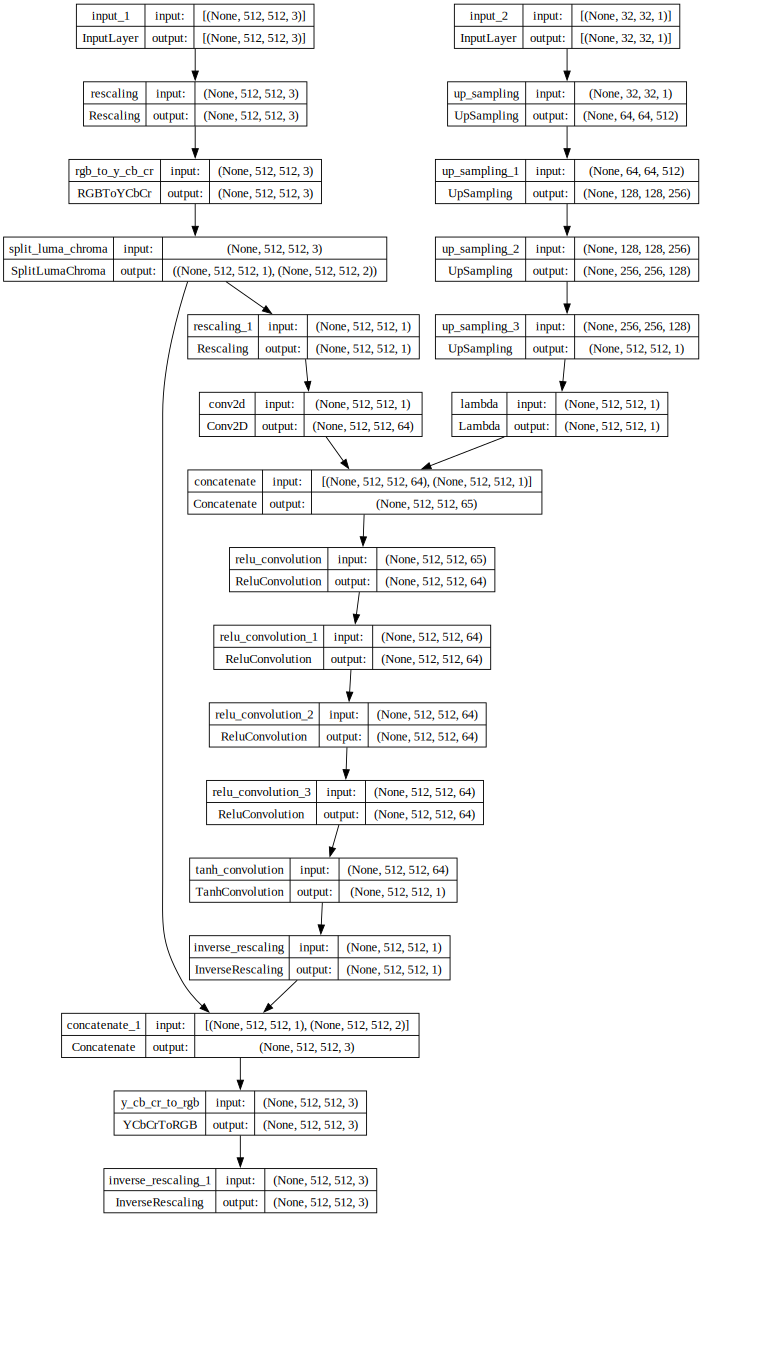

In [5]:
SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

# Extraction of watermark

In [6]:
model = create_extract_mark((512, 512, 3))

In [7]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 512, 512, 3)       0         
                                                                 
 rgb_to_y_cb_cr_1 (RGBToYCb  (None, 512, 512, 3)       0         
 Cr)                                                             
                                                                 
 split_luma_chroma_1 (Split  ((None, 512, 512, 1),     0         
 LumaChroma)                  (None, 512, 512, 2))               
                                                                 
 rescaling_3 (Rescaling)     (None, 512, 512, 1)       0         
                                                                 
 relu_convolution_4 (ReluCo  (None, 256, 256, 128)     1792

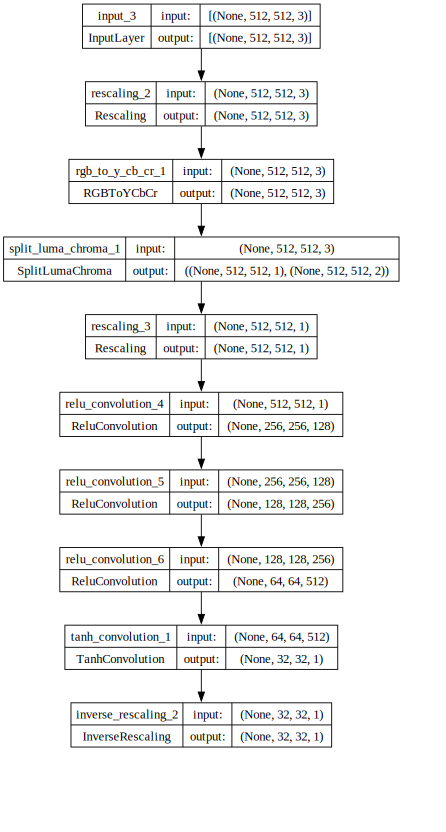

In [8]:
SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))